### Sensitivity analysis for OW installed capacity

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import NO_NODES, OFFSHORE_AREAS
from cycler import cycler

SENSITIVITY = "Cap"
DESCRIPTION = "investment cost OW"

CASES = ["Base"] + [SENSITIVITY + "/" + SENSITIVITY + "P" + str(percentage) for percentage in range(10, 40, 10)] \
                    + [SENSITIVITY + "/" + SENSITIVITY + "N" + str(percentage) for percentage in range(10, 40, 10)]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'Results/{case}/results_output_gen.csv')

    # Define case value for plots
    case_sensitivity = None
    if case[-3] == "P":
        case_sensitivity = "+" + case[-2:] + "%"
    elif case[-3] == "N":
        case_sensitivity = "-" + case[-2:] + "%"
    _df["Case"] = case_sensitivity if case_sensitivity is not None else case
    
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'Base':           Node         GeneratorType     Period  genInvCap_MW  \
 0      BosniaH      Liginiteexisting  2020-2025  0.000000e+00   
 1      BosniaH      Liginiteexisting  2025-2030  0.000000e+00   
 2      BosniaH      Liginiteexisting  2030-2035  0.000000e+00   
 3      BosniaH      Liginiteexisting  2035-2040  0.000000e+00   
 4      BosniaH      Liginiteexisting  2040-2045  0.000000e+00   
 ...        ...                   ...        ...           ...   
 5899  SørvestD  Windoffshorefloating  2035-2040  1.664920e-05   
 5900  SørvestD  Windoffshorefloating  2040-2045  2.285531e-04   
 5901  SørvestD  Windoffshorefloating  2045-2050  9.332931e-03   
 5902  SørvestD  Windoffshorefloating  2050-2055  9.369810e-07   
 5903  SørvestD  Windoffshorefloating  2055-2060  8.311450e-06   
 
       genInstalledCap_MW  genExpectedCapacityFactor  \
 0            1888.000000               7.500000e-01   
 1            1161.846154               7.260993e-01   
 2             780.615385     

Merge data sets

In [103]:
df_combined = pd.concat([_df for _df in DF_BY_CASES.values()])
df_combined

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,7.500000e-01,0.000000e+00,12404.159667,Base
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,7.260993e-01,0.000000e+00,7390.073347,Base
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,6.397329e-01,0.000000e+00,4374.615676,Base
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,3.455009e-03,0.000000e+00,16.483265,Base
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,5.164681e-08,0.000000e+00,0.000171,Base
...,...,...,...,...,...,...,...,...,...
5899,SørvestD,Windoffshorefloating,2035-2040,0.002911,0.004084,3.397534e-01,3.361290e+03,0.012155,-30%
5900,SørvestD,Windoffshorefloating,2040-2045,0.000002,0.004086,3.390525e-01,1.703207e+00,0.012136,-30%
5901,SørvestD,Windoffshorefloating,2045-2050,6074.995140,6074.999955,4.213198e-01,2.889708e+09,22421.377930,-30%
5902,SørvestD,Windoffshorefloating,2050-2055,0.000034,6074.999906,3.792068e-01,9.108661e+00,20180.246976,-30%


Select only OW sources in NS

In [104]:
#df_ow = df_combined[(df_combined['GeneratorType'] == 'Windoffshorefloating') | (df_combined['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_NS = df_combined[df_combined["Node"].isin(OFFSHORE_AREAS)]
df_ow_NS

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
5408,MorayFirth,Windoffshoregrounded,2020-2025,1.420744e-05,588.000014,0.516249,5.027223e+01,2659.134186,Base
5409,MorayFirth,Windoffshoregrounded,2025-2030,3.105658e-08,588.000014,0.442946,8.610321e-02,2281.562819,Base
5410,MorayFirth,Windoffshoregrounded,2030-2035,5.943217e+01,647.432152,0.365594,9.519825e+07,2073.468435,Base
5411,MorayFirth,Windoffshoregrounded,2035-2040,1.192544e+03,1839.975696,0.378714,1.496701e+09,6104.179927,Base
5412,MorayFirth,Windoffshoregrounded,2040-2045,3.625024e+03,5464.999994,0.342613,2.965310e+09,16402.054758,Base
...,...,...,...,...,...,...,...,...,...
5899,SørvestD,Windoffshorefloating,2035-2040,2.911022e-03,0.004084,0.339753,3.361290e+03,0.012155,-30%
5900,SørvestD,Windoffshorefloating,2040-2045,2.305943e-06,0.004086,0.339052,1.703207e+00,0.012136,-30%
5901,SørvestD,Windoffshorefloating,2045-2050,6.074995e+03,6074.999955,0.421320,2.889708e+09,22421.377930,-30%
5902,SørvestD,Windoffshorefloating,2050-2055,3.362995e-05,6074.999906,0.379207,9.108661e+00,20180.246976,-30%


Plot capacity of offshore wind by sensitivity case

In [105]:
cap_by_period_and_case = df_ow_NS.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().to_dict()

# Convert from MW to GW
# cap_by_period_and_case = {k: v / 1000 for k, v in cap_by_period_and_case.items()}
# cap_by_period_and_case

periods = sorted(set([period for (period, _) in cap_by_period_and_case.keys()]))
periods_displayed = [period.split("-")[1] for period in periods]

Installed offshore wind capacity (GW) by different investment cost OW scenarios


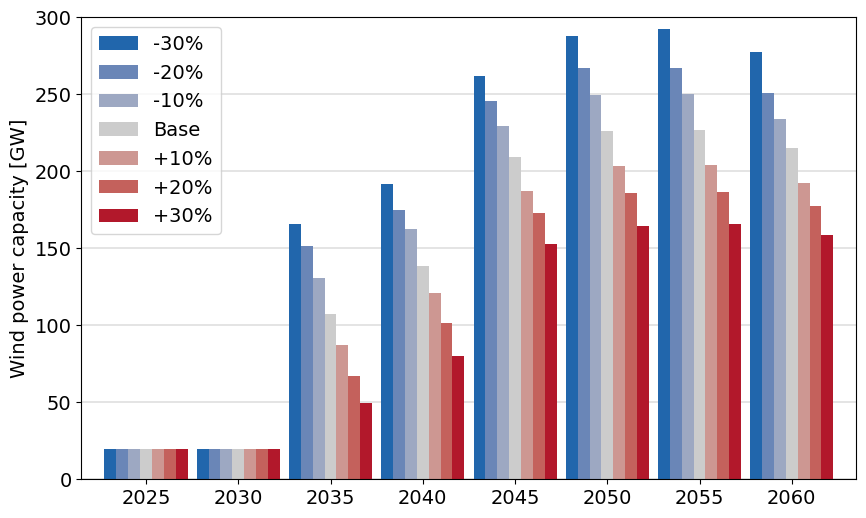

In [106]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NS.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%','+30%']

# Plot the grouped data as a bar chart
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.9)

# Customize the chart
print(f'Installed offshore wind capacity (GW) by different {DESCRIPTION} scenarios')
ax.set_ylabel('Wind power capacity [GW]')
ax.set_xlabel(None)
ax.legend(loc='upper left')
ax.set_ylim(0, 300)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels(periods_displayed, rotation=0)
plt.savefig(f"SavedFigs/OW-sens-NS/{SENSITIVITY}", bbox_inches="tight")
plt.show()

#### For NO OW

In [107]:
df_ow_NO = df_ow_NS[df_ow_NS["Node"].isin(NO_NODES)]
df_ow_NO

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
5496,NordvestA,Windoffshoregrounded,2020-2025,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Base
5497,NordvestA,Windoffshoregrounded,2025-2030,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Base
5498,NordvestA,Windoffshoregrounded,2030-2035,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Base
5499,NordvestA,Windoffshoregrounded,2035-2040,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Base
5500,NordvestA,Windoffshoregrounded,2040-2045,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Base
...,...,...,...,...,...,...,...,...,...
5899,SørvestD,Windoffshorefloating,2035-2040,0.002911,0.004084,0.339753,3.361290e+03,0.012155,-30%
5900,SørvestD,Windoffshorefloating,2040-2045,0.000002,0.004086,0.339052,1.703207e+00,0.012136,-30%
5901,SørvestD,Windoffshorefloating,2045-2050,6074.995140,6074.999955,0.421320,2.889708e+09,22421.377930,-30%
5902,SørvestD,Windoffshorefloating,2050-2055,0.000034,6074.999906,0.379207,9.108661e+00,20180.246976,-30%


Installed offshore wind capacity (GW) by different investment cost OW scenarios NO areas


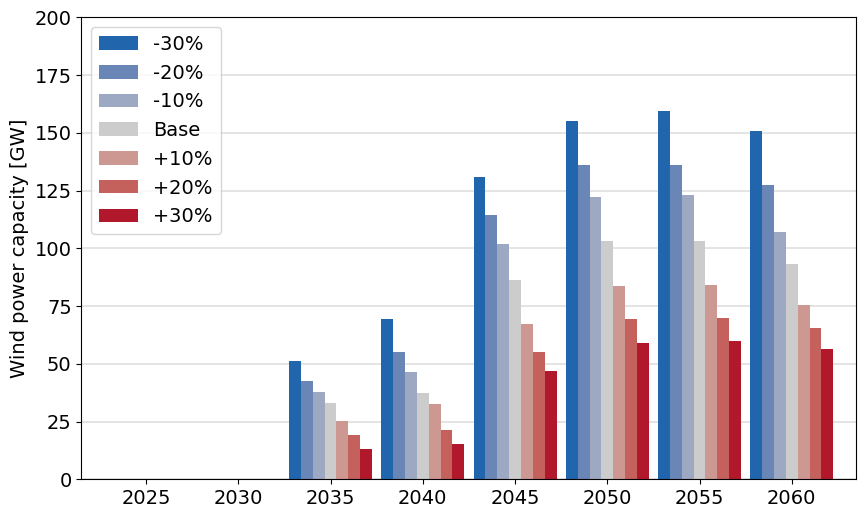

In [108]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%', '+30%']

# Plot the grouped data as a bar chart
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.9)


# Customize the chart
print(f'Installed offshore wind capacity (GW) by different {DESCRIPTION} scenarios NO areas')
ax.set_ylabel('Wind power capacity [GW]')
ax.set_xlabel(None)
ax.legend(loc='upper left')
ax.set_ylim(0, 200)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels(periods_displayed, rotation=0)
plt.savefig(f"SavedFigs/OW-sens-NO/{SENSITIVITY}", bbox_inches="tight")
plt.show()

#### Change in other technologies

In [109]:
# Get total capacity for techs in given period and case
total_gen_by_case_and_period = df_combined.groupby(['Period', 'Case', 'GeneratorType'])['genInstalledCap_MW'].sum().to_dict()

# Unique values
periods = sorted(set([period for (period, _, _) in total_gen_by_case_and_period.keys()]))
cases = set([case for (_, case, _) in total_gen_by_case_and_period.keys()])
techs = set([tech for (_, _, tech) in total_gen_by_case_and_period.keys()])

# Convert from MW to GW
total_gen_by_case_and_period = {k: v / 1000 for k, v in total_gen_by_case_and_period.items()}

# Create dataframe
df_rows = []
df_cols = ["Period", "Case", "Tech", "Installed capacity GW"]

for (period, case, tech), cap in total_gen_by_case_and_period.items():
    df_rows.append([period, case, tech, cap])

df_total_gen = pd.DataFrame(df_rows, columns=df_cols)
df_total_gen

,Period,Case,Tech,Installed capacity GW
0,2020-2025,+10%,Bio,0.000029
1,2020-2025,+10%,Bio10cofiring,12.123558
2,2020-2025,+10%,Bio10cofiringCCS,0.000000
3,2020-2025,+10%,Bioexisting,34.841000
4,2020-2025,+10%,Coal,0.000244
...,...,...,...,...
1563,2055-2060,Base,Waste,10.488376
1564,2055-2060,Base,Wave,2.352000
1565,2055-2060,Base,Windoffshorefloating,54.882336
1566,2055-2060,Base,Windoffshoregrounded,217.936019


Calculated diff to base for each row

In [110]:
lookup_table = df_total_gen.copy()

def diff_to_base_GW(df_row):
    period = df_row["Period"]
    tech = df_row["Tech"]
    case = "Base"
    base_value = lookup_table[(period == lookup_table["Period"]) & \
                              (tech == lookup_table["Tech"]) & \
                                (case == lookup_table["Case"])]["Installed capacity GW"].sum()
    
    df_row["GW base"] = round(base_value, 1)
    df_row["GW diff to base"] = round(df_row["Installed capacity GW"] - base_value, 1)

    if base_value > 0:
        df_row["GW diff to base %"] = round((df_row["Installed capacity GW"]/base_value - 1) * 100, 1)
    else:
        df_row["GW diff to base %"] = "N/A"

    df_row["Installed capacity GW"] = round(df_row["Installed capacity GW"], 1)

    return df_row

df_total_gen = df_total_gen.apply(lambda row: diff_to_base_GW(row), axis=1)

# Remove small diffs (<10 MW)
df_total_gen_sens = df_total_gen[abs(df_total_gen["GW diff to base"]) > 0.01].reset_index(drop=True)
df_total_gen_sens

,Period,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
0,2020-2025,+10%,Bio10cofiring,12.1,12.4,-0.3,-2.1
1,2020-2025,+10%,Lignite,28.4,28.8,-0.4,-1.3
2,2020-2025,+10%,Solar,188.6,188.1,0.5,0.3
3,2020-2025,+10%,Windonshore,241.1,240.8,0.3,0.1
4,2020-2025,+20%,Bio10cofiring,11.9,12.4,-0.4,-3.6
...,...,...,...,...,...,...,...
473,2055-2060,-30%,Solar,1504.9,1521.9,-17.0,-1.1
474,2055-2060,-30%,Waste,10.3,10.5,-0.2,-2.0
475,2055-2060,-30%,Windoffshorefloating,118.6,54.9,63.7,116.0
476,2055-2060,-30%,Windoffshoregrounded,265.4,217.9,47.5,21.8


Filter by period and case to look at values

In [111]:
FILTER_PERIOD = "2045-2050" # Installed capacity at end of period (e.g. 2045-2050 = 2050)
FILTER_CASE = "-30%"

df_total_gen_sens_filtered = df_total_gen_sens[(df_total_gen_sens["Period"] == FILTER_PERIOD) & (df_total_gen_sens["Case"] == FILTER_CASE)]
df_total_gen_sens_filtered.sort_values(by=["GW diff to base"], ascending=False)

,Period,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
326,2045-2050,-30%,Windoffshorefloating,115.8,54.8,61.0,111.4
327,2045-2050,-30%,Windoffshoregrounded,278.7,251.7,27.1,10.8
321,2045-2050,-30%,GasOCGT,170.9,169.7,1.2,0.7
319,2045-2050,-30%,Bio10cofiring,13.3,12.4,0.9,7.0
322,2045-2050,-30%,Hydroregulated,106.2,106.1,0.2,0.2
323,2045-2050,-30%,Hydrorun-of-the-river,125.8,125.7,0.1,0.1
320,2045-2050,-30%,GasCCGT,240.8,241.3,-0.5,-0.2
318,2045-2050,-30%,Bio,251.2,253.8,-2.6,-1.0
325,2045-2050,-30%,Solar,1502.6,1506.9,-4.2,-0.3
324,2045-2050,-30%,Nuclear,219.3,241.8,-22.5,-9.3
